In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from windrose import plot_windrose

In [2]:
def read_file(filename):
    df = pd.read_csv(filename, parse_dates=[1])
    df.dropna(subset=['value'], inplace=True)
    df.date = pd.to_datetime(df.date, format="%Y-%m-%d")
    df.index = df.date
    df.sort_index(inplace=True)
    return df

In [3]:
df1 = read_file('data/Fresno/WINSPD_PICKDATA_2014-12-31.csv')
df2 = read_file('data/Fresno/WINSPD_PICKDATA_2015-12-31.csv')
df3 = read_file('data/Fresno/WINSPD_PICKDATA_2016-12-31.csv')

In [4]:
def split_into_list(x):
    if x == 'CALM':
        return (0, 0)
    else:
        y = x.split('/')
        return (float(y[0]), float(y[1]))

In [11]:
df1["value_split"] = df1.value.apply(split_into_list)
df2["value_split"] = df2.value.apply(split_into_list)
df3["value_split"] = df3.value.apply(split_into_list)

df_tot = pd.concat([df1, df2, df3])

In [13]:
df_tot['direction'] = df_tot.value_split.apply(lambda x: x[0])
df_tot['speed']= df_tot.value_split.apply(lambda x: x[1])

5.5

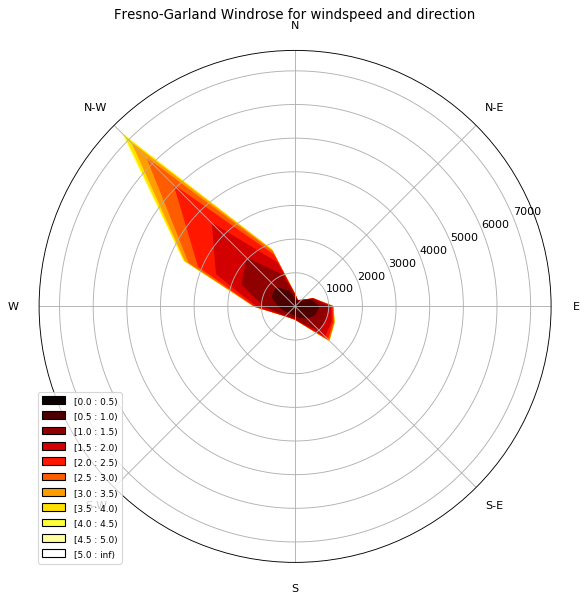

In [14]:
fig = plt.figure()
plot_windrose(df_tot, kind='contourf', bins=np.arange(0.01, max(df_tot.speed), 0.5), cmap=cm.hot )
plt.title("Fresno-Garland Windrose for windspeed and direction")

In [15]:
def get_data_season(df_in, months):
    df = df_in.loc[ df_in['date'].map( lambda x: x.month in months )]
    return df

In [17]:
df_spring = get_data_season(df_tot, [3, 4, 5])
df_summer = get_data_season(df_tot, [6, 7, 8])
df_fall = get_data_season(df_tot, [9, 10, 11])
df_winter = get_data_season(df_tot, [12, 1, 2])

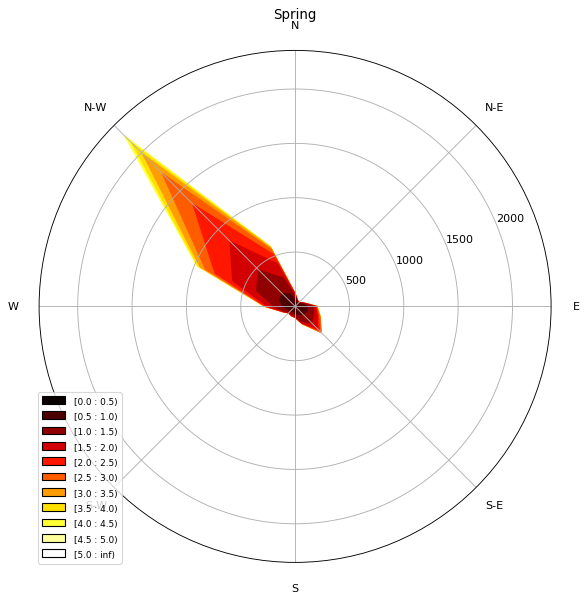

In [19]:
plot_windrose(df_spring, kind='contourf', bins=np.arange(0.01, max(df_spring.speed), 0.5), cmap=cm.hot )
plt.title("Spring")

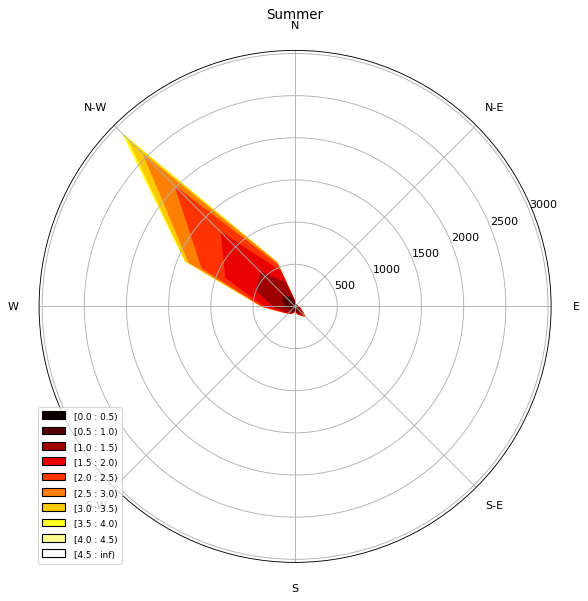

In [20]:
plot_windrose(df_summer, kind='contourf', bins=np.arange(0.01, max(df_summer.speed), 0.5), cmap=cm.hot )
plt.title("Summer")

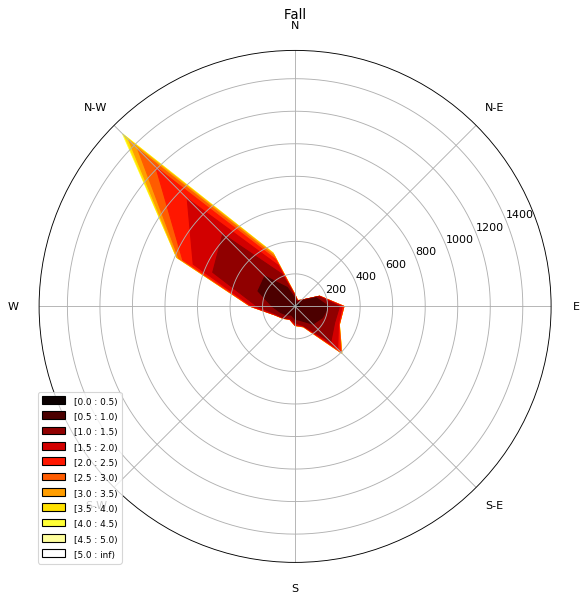

In [21]:
plot_windrose(df_fall, kind='contourf', bins=np.arange(0.01, max(df_fall.speed), 0.5), cmap=cm.hot )
plt.title("Fall")

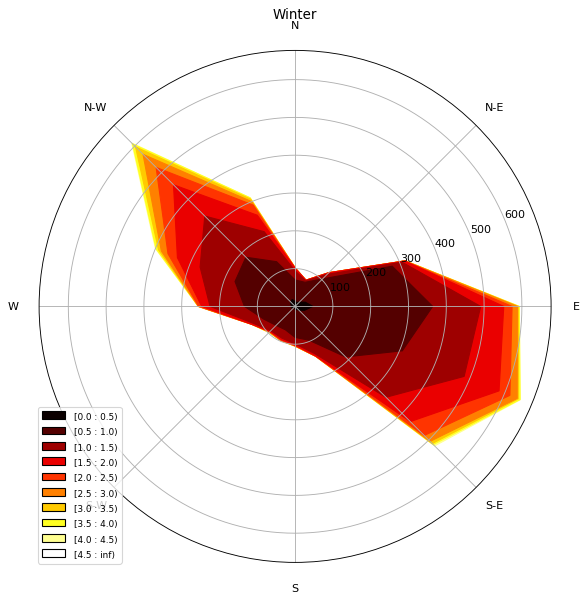

In [22]:
plot_windrose(df_winter, kind='contourf', bins=np.arange(0.01, max(df_winter.speed), 0.5), cmap=cm.hot )
plt.title("Winter")